# Regression Analysis

- so far, we've learned the main concepts behind supervised learning and trained many models for classification tasks to predict group memberships or categorial variables
- regression models are used to predict target variable on a continuous scale
- some important applications are:
    1. predicting insurance premium
    2. making weather forecast
    3. predicting stock market
    4. predicting housing market
    5. predicting sales of a company in future month, etc.

- In this notebook, we will discuss the main concepts of regression models and cover the following topics:
    - Exploring and visualizing datasets
    - Looking at different approaches to implement linear regression models
    - Training regression models that are robust to outliers
    - Evaluating regression models and diagnosing common problems
    - Fitting regression models to nonlinear data
    
## Linear regression
- the goal of linear regression is to model the relationship between one or multiple features and a continuous target variable

### Simple linear regression
- the goal of simple (**univariate**) linear regression is to model the relationship between a single feature (**explanatory variable**, *x*) and a continuous-valued **target (response variable**, *y*) 
- the equation of a linear model with one explanatory variable is defined as follows:
    - $y = w_0 + w_1x$
        - $w_0$ is the $y$ axis incercept
        - $w_1$ is the weight coefficient independent variable
- the goal is to learn the weights of the linear equation to describe the relationship between the independent variable and the target variable
- the learned weights can be used predict responses of new samples
- visusally, linear regression can be understood as finding the best-fitting straight line through the training example, as shown in the following figure
![Linear Regression](./images/linear-reg-1.png)
- the best-fitting line is also called the regression line
- the vertical lines from the regression line to the training examples are the **offsets** or **residual** -- the errors of our prediction

### Multiple linear regression
- generalizing the linear regression model to multiple explanatory variables

    - $y = w_0 x_0 + w_1 x_1 + w_nx_x = \sum_{i=0}^{n}w_i x_i = w^T x$

- visualizing 2-d, fitted hyperplane of a multiple linear regression model with two features is already difficult
![Multiple linear regression](./images/multiple-linear-reg.png) 
- due to the challenge and limitations of visualizing multiple linear regression hyperplanes in dataset with more than 2 features, we'll focus on univariate case, using simple regression models

### Solving regression for regression parameters with gradient descent

- [YouTube Video](https://www.youtube.com/watch?v=sDv4f4s2SB8)

## Exploring the Housing dataset
- housing dataset contains information about houses in the suburbs of Boston collected in 1978
- made freely available from UCI ML Repository or Sci-kit learn - https://github.com/scikit-learn/scikit-learn/blob/main/sklearn/datasets/data/boston_house_prices.csv
- 506 examples with 14 columns
- feature description:
    - CRIM: Per capita crime rate by town
    - ZN: Proportion of residential land zoned for lots over 25,000 sq. ft.
    - INDUS: Proportion of non-retail business acres per town
    - CHAS: Charles River dummy variable (= 1 if tract bounds river and 0 otherwise)
    - NOX: Nitric oxide concentration (parts per 10 million)
    - RM: Average number of rooms per dwelling
    - AGE: Proportion of owner-occupied units built prior to 1940
    - DIS: Weighted distances to five Boston employment centers
    - RAD: Index of accessibility to radial highways
    - TAX: Full-value property tax rate per \$10,000
    - PTRATIO: Pupil-teacher ratio by town
    - B: $1000(Bk – 0.63)^2$, where $Bk$ is the proportion of [people of African American descent] by town
    - LSTAT: Percentage of lower status of the population
    - MEDV: Median value of owner-occupied homes in $\$1000s$

In [1]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/scikit-learn/scikit-learn/main/sklearn/datasets/data/boston_house_prices.csv'
df = pd.read_csv(url, header=1) # column header is at row 1

In [2]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


## Visualize the important characteristics of a dataset
- **Exploratory data analysis (EDA)** allows us to visually detect the presence of outliers, distribution of the data, and the relationships between features
- let's create **scatterplot matrix** that allows us to visualize the pair-wise correlations between the different features in one place
- due to space constraint, we'll use some selected columns
    - feel free to explore all...

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']

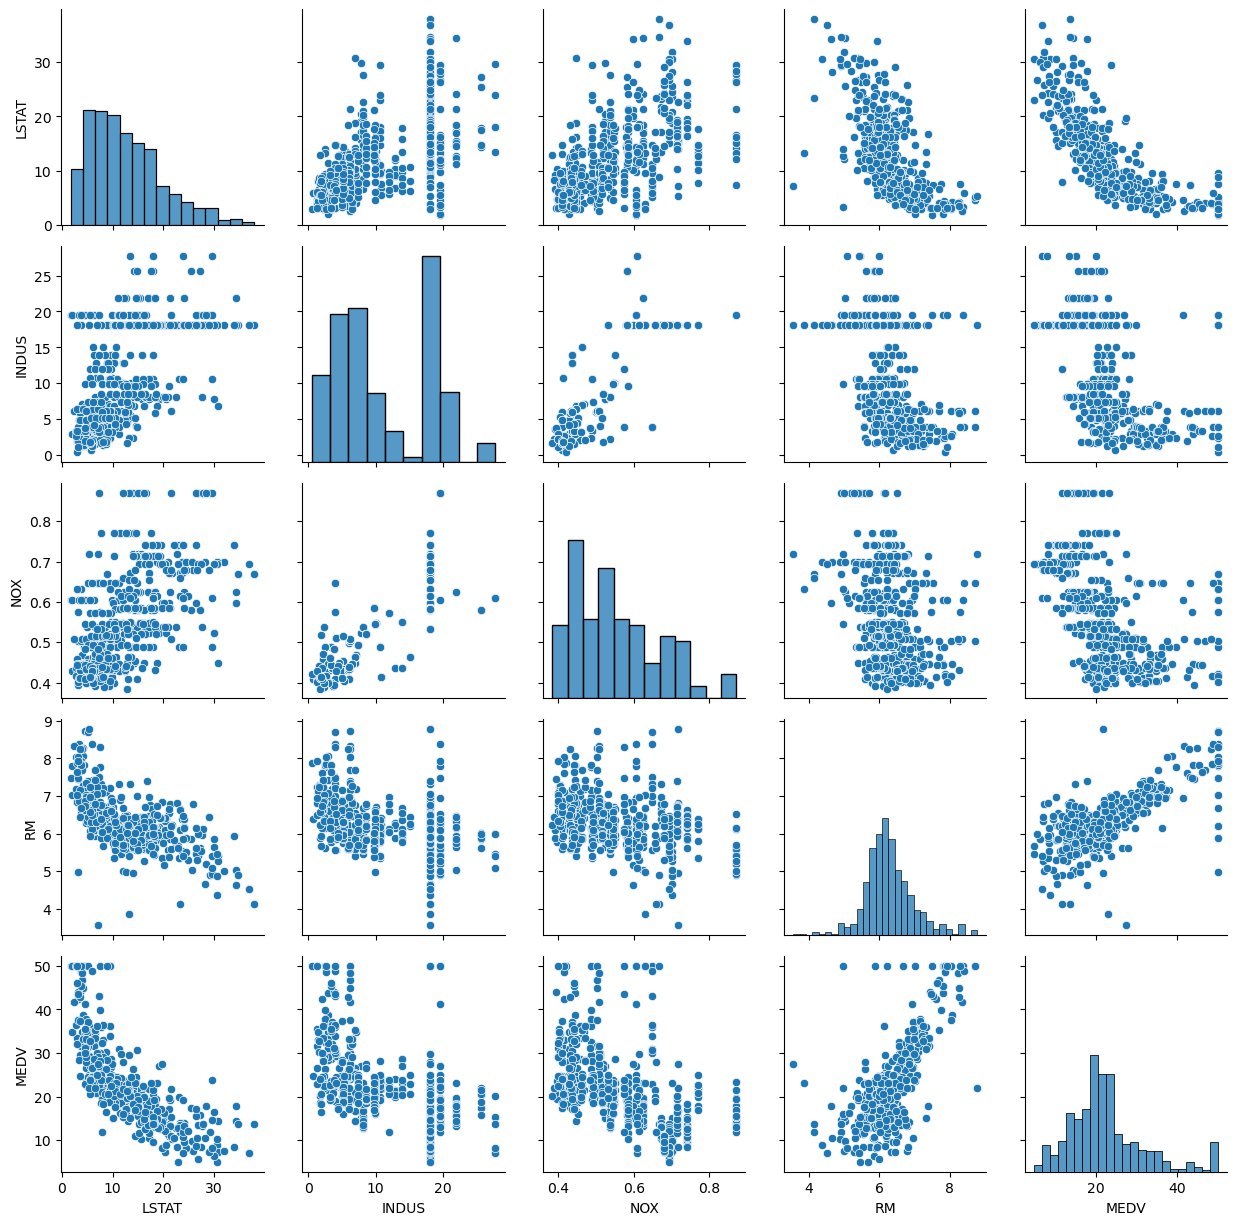

In [5]:
g = sns.PairGrid(df.loc[:, cols])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

- eyeball some observations:
    - diagonal charts are just histogram distribution of each feature on x-axis
    - there's a linear relationship between RM and MEDV (the median house price)
    - the MEDV feature seems to be normally distributed but contains several outliers

## Looking at relationships using a correlation matrix
- let's create a correlation matrix to quantify and summarize linear relationships between variables
- the correlation matrix is a square matrix that contains the Pearson product-moment correlation coefficient (often abbreviated as Pearson's r) which measures the linear dependence between pairs of features
    - textbook provides the equation to calculate Pearson's correlation
- the Pearson's correlation coefficients are in the range -1 to 1
- two features have a perfect positive correlation if r = 1,
    - no correlation if r = 0, and 
    - a perfect negative correlation if r = –1
- we'll use MLxtend library (https://rasbt.github.io/mlxtend/) to plot the heatmap of the Pearson's correlation matrix

In [6]:
! pip install mlxtend

In [7]:
import matplotlib.pyplot as plt
from mlxtend.plotting import heatmap
import numpy as np

In [8]:
cm = np.corrcoef(df[cols].values.T)

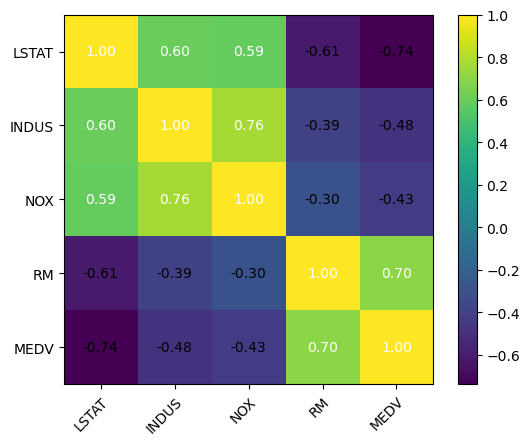

In [9]:
hm = heatmap(cm, row_names=cols, column_names=cols)

## Estimating the coefficient of a regression model
- use scikit learn's LinearRegression API

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
# let's just use no. of bedrooms as feature for the sake of simplicity
X = df[['RM']]

In [12]:
X

,RM
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147
...,...
501,6.593
502,6.120
503,6.976
504,6.794


In [13]:
y = df['MEDV']

In [14]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [15]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [16]:
y_pred = lr.predict(X)

In [17]:
lr.coef_

array([9.10210898])

In [18]:
print(f'Slope, w0: {lr.coef_[0]:.3f}')

Slope, w0: 9.102


In [19]:
print(f'Intercept: {lr.intercept_:.3f}')

Intercept: -34.671


### plot the regression line
- the best fitting line on the dataset

[Text(0, 0.5, 'Price in \\$1000s [MEDV]'),
 Text(0.5, 0, 'Average number of rooms [RM]')]

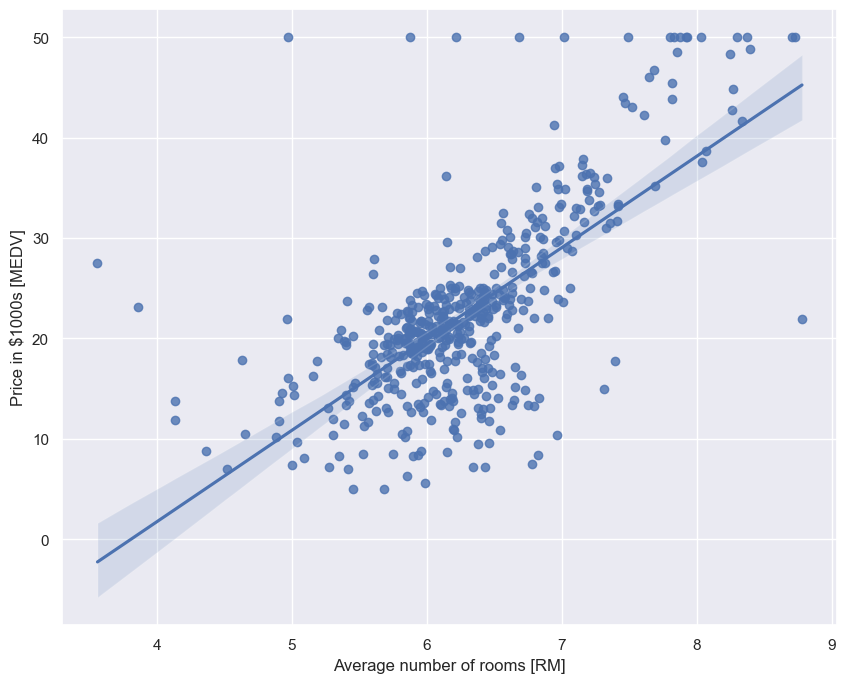

In [20]:
sns.set_theme(color_codes=True)
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.regplot(x="RM", y="MEDV", data=df)
ax.set(ylabel="Price in \$1000s [MEDV]", xlabel="Average number of rooms [RM]")

In [21]:
import locale # currency formatting
locale.setlocale(locale.LC_ALL, 'en_CA.UTF-8') # set US locale

'en_CA.UTF-8'

In [22]:
# let's predict the price for a 5 bedroom house
num_rooms = np.array([[5.0]])
price = lr.predict(num_rooms)
print(f'''Price of {num_rooms[0][0]:.0f} bedroom house is predicted as
          {locale.currency(price[0]*1000, grouping=True )}''')

Price of 5 bedroom house is predicted as
          $10,839.92


/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Fitting a robust regression model using RANSAC
- Linear regression models can be heavily impacted by the presence of outliers
- outliers can be detected and removed; however, requires judgement as data scientist and the domain knowledge
- alternative to throwing outliers is using the RANSAC - RANdom SAmple Consensus algorithm
    - fits a regression model to a subset of the data (**inliers**)

- We can summarize the iterative RANSAC algorithm as follows:
    1. Select a random number of examples to be inliers and fit the model.
    2. Test all other data points against the fitted model and add those points that fall within a user-given tolerance to the inliers.
    3. Refit the model using all inliers.
    4. Estimate the error of the fitted model versus the inliers.
    5. Terminate the algorithm if the performance meets a certain user-defined threshold or if a fixed number of iterations were reached; go back to step 1 otherwise.
    
- use RANSACRegression API of scikit-learn - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RANSACRegressor.html

In [23]:
from sklearn.linear_model import RANSACRegressor

In [24]:
ransac = RANSACRegressor(LinearRegression(), max_trials=100,
                        min_samples=50,
                        loss='absolute_error',
                        residual_threshold=5.0,
                        random_state=0)

In [25]:
ransac.fit(X, y)

RANSACRegressor(estimator=LinearRegression(), min_samples=50, random_state=0,
                residual_threshold=5.0)

/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RANSACRegressor was fitted with feature names
  warnings.warn(


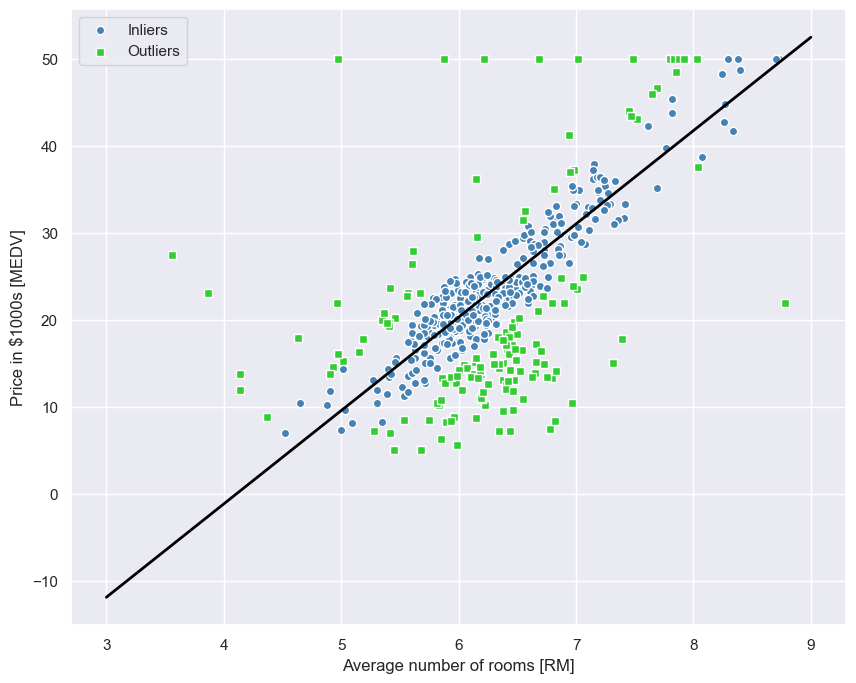

In [26]:
# let's obtain the inliers and outliers from the fitted ransac
# plot them with the linear fit
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])

fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)

plt.scatter(X[inlier_mask], y[inlier_mask],
            c='steelblue', edgecolor='white',
            marker='o', label='Inliers') 
plt.scatter(X[outlier_mask], y[outlier_mask], 
            c='limegreen', edgecolor='white',
            marker='s', label='Outliers') 
plt.plot(line_X, line_y_ransac, color='black', lw=2) 
plt.xlabel('Average number of rooms [RM]') 
plt.ylabel('Price in $1000s [MEDV]') 
plt.legend(loc='upper left')

In [27]:
print(f'Slope: {ransac.estimator_.coef_[0]:.3f}')
print(f'Intercept: {ransac.estimator_.intercept_:.3f}')
# we get a slightly different slope and intercept compared to straight linear regression

Slope: 10.735
Intercept: -44.089


In [28]:
# let's predict the price for a 5-bedroom house with ransac model
num_rooms = np.array([[5.0]])
price = ransac.predict(num_rooms)
print(f'Price of {num_rooms[0][0]:.0f} bedroom house is predicted as \
          {locale.currency(price[0]*1000, grouping=True )}')

Price of 5 bedroom house is predicted as           $9,583.48


/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RANSACRegressor was fitted with feature names
  warnings.warn(


## Evaluating the performance of linear regression models
- like supervised classifiers, regressors need to be trained on training set and evaluate on test set
- the goal is to evaluate the model's performance on unseen data to estimate the generalization performance
- in order to properly evaluate the model, we'll use all the variables/features in the dataset

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X = df.iloc[:, :-1].values # use all the columns except for the last as explanatory variables
y = df['MEDV'].values # use the last column as dependent/response variable
# 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [31]:
slr = LinearRegression()
slr.fit(X_train, y_train)
# get the training and testing prediction
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

### Residual plots
- since our model uses multiple explanatory variables, we can't visualize the linear regression line or hyperplane
- residual plots lets us visualize the residual (differences or vertical distances between the actual and predicted values) versus the predicted values to diagnose our regression model
- the following code plots a residual plot by simply subtracting the true target value from predicted responses

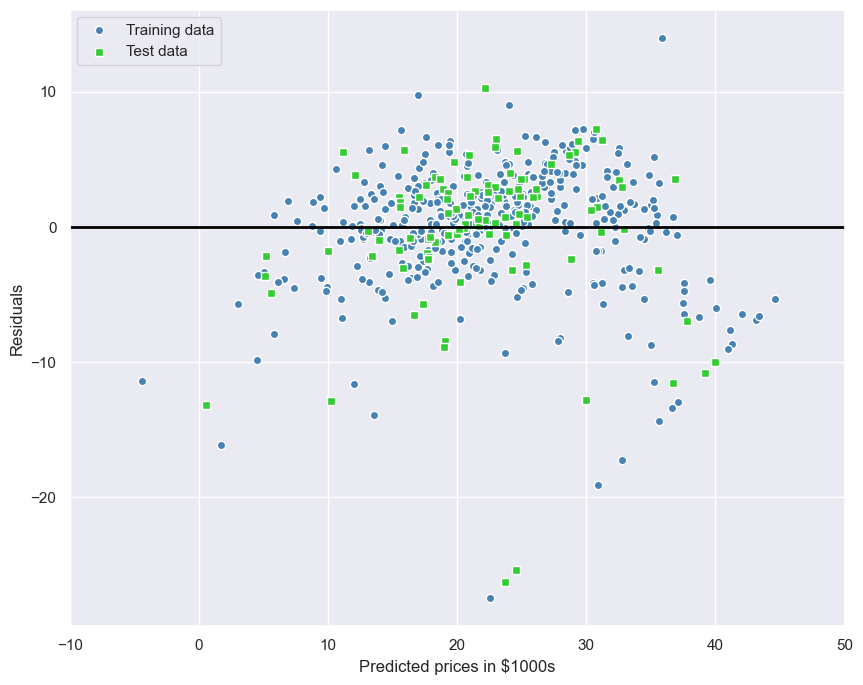

In [32]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.scatter(y_train_pred, y_train_pred - y_train, 
            c='steelblue', marker='o', 
            edgecolor='white', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='limegreen', 
            marker='s', edgecolor='white', label='Test data')
plt.xlabel('Predicted prices in $1000s')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.show()

### Mean Squared Error (MSE)
- useful quantitative measure of regressor models' performance
- simply the averaged value of the Sum of Squared Errors (SSE)
    - $MSE = \frac{1}{n}\sum_{1=1}^{n}(y^{(i)}-\hat y^{(i)})^2$

In [33]:
from sklearn.metrics import mean_squared_error

In [34]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'MSE train {mse_train:.3f} test: {mse_test:.3f}')

MSE train 19.326 test: 33.449


### interpreting errors
- if the difference in train and test mean squared errors (MSE) is big, means the model is overfitting the training data
- the interpretration of MSE depends on the dataset and feature scaling
- e.g., if the house prices were represented as multiples of 1,000 (with K suffix), the same model would yield a lower MSE compared to a model that worked with unscaled features
    - $(10K - 15K)^2 < (10,000 - 15,000)^2$
    
### Coefficient of determination ($R^2$)
- standarized version of the MSE for better interpretation of the MSE
- $R^2$ is the fraction of response variance captured by the model
     
     $R^2 = 1 - \frac {MSE}{Var(y)}$
- higer the $R^2$, better the prediction meaning lesser the error

In [35]:
from sklearn.metrics import r2_score

In [36]:
print('R^2 train: %.3f, test: %.3f' %
      (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

R^2 train: 0.773, test: 0.589


## Running a linear regression model into a curve - polynomial regression
- linearity assumption in data can be violated with polynomial regression model by adding polynomial terms:

    - $y=w_0+w_1x+w_2x^2 + ... + w_nx^n$
    - $n$ denotes the degree of the polynomial
- although we can use ploynomial regression to model nonlinear relationshop, it is still considered a multiple linear regression model because of regression coefficients, $w$

## Adding ploynomial terms
- can use `PolynomialFeatures` trasformer in scikit-learn to add a quadratic term (degree = 2)
- compare the linear with the polynomial fit

In [37]:
from sklearn.preprocessing import PolynomialFeatures

In [38]:
# create a toy dataset
X_train = np.array([258.0, 270.0, 294.0, 320.0, 342.0,
              368.0, 396.0, 446.0, 480.0, 586.0])[:, np.newaxis]

In [39]:
X_train

array([[258.],
       [270.],
       [294.],
       [320.],
       [342.],
       [368.],
       [396.],
       [446.],
       [480.],
       [586.]])

In [40]:
y_train = np.array([ 236.4, 234.4, 252.8, 298.6, 314.2, 342.2, 360.8, 368.0, 391.2, 390.8])

In [41]:
y_train

array([236.4, 234.4, 252.8, 298.6, 314.2, 342.2, 360.8, 368. , 391.2,
       390.8])

In [42]:
# add a second degree polynomial term
quadratic = PolynomialFeatures(degree=2) 
X_quad = quadratic.fit_transform(X_train)

In [43]:
X_quad

array([[1.00000e+00, 2.58000e+02, 6.65640e+04],
       [1.00000e+00, 2.70000e+02, 7.29000e+04],
       [1.00000e+00, 2.94000e+02, 8.64360e+04],
       [1.00000e+00, 3.20000e+02, 1.02400e+05],
       [1.00000e+00, 3.42000e+02, 1.16964e+05],
       [1.00000e+00, 3.68000e+02, 1.35424e+05],
       [1.00000e+00, 3.96000e+02, 1.56816e+05],
       [1.00000e+00, 4.46000e+02, 1.98916e+05],
       [1.00000e+00, 4.80000e+02, 2.30400e+05],
       [1.00000e+00, 5.86000e+02, 3.43396e+05]])

In [44]:
# fit a simple linear regression model for comparison
lr = LinearRegression()
# fit linear features
lr.fit(X_train, y_train)
X_test = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_test = lr.predict(X_test)

In [45]:
# fit quadratic features
pr = LinearRegression()
pr.fit(X_quad, y_train)
y_quad_test = pr.predict(quadratic.fit_transform(X_test))

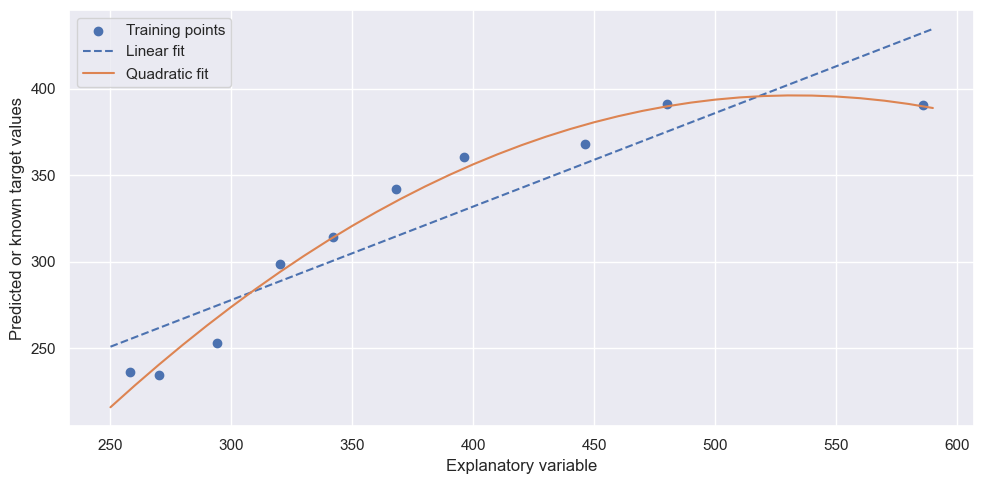

In [46]:
# plot results
fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(X_train, y_train, label='Training points')
plt.plot(X_test, y_lin_test, label='Linear fit', linestyle='--')
plt.plot(X_test, y_quad_test, label='Quadratic fit')
plt.xlabel('Explanatory variable')
plt.ylabel('Predicted or known target values')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/10_11.png', dpi=300)
plt.show()

In [47]:
# find the MSE and R^2
y_lin_pred = lr.predict(X_train)
y_quad_pred = pr.predict(X_quad)

In [48]:
print('Training MSE linear: %.3f, quadratic: %.3f' % (
        mean_squared_error(y_train, y_lin_pred),
        mean_squared_error(y_train, y_quad_pred)))
print('Training R^2 linear: %.3f, quadratic: %.3f' % (
        r2_score(y_train, y_lin_pred),
        r2_score(y_train, y_quad_pred)))

Training MSE linear: 569.780, quadratic: 61.330
Training R^2 linear: 0.832, quadratic: 0.982


## Modeling nonlinear relationships in the Housing dataset
- let's model the relationship between house prices and LSTAT (percentage of lower status of the population) using second-degree (quadratic) and third-degree (cubic) polynomials
- compare quadratic and cubic polynomaials with linear fit

In [49]:
# use just one feature LSTAT as an explanatory feature
X = df[['LSTAT']].values
y = df['MEDV'].values # target variable

In [50]:
regr = LinearRegression()

In [51]:
# create quadratic features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

In [52]:
# test data
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

In [53]:
# fit linear features
regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

In [54]:
# fit quadratic features
regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

In [55]:
# fit cubic features
regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))

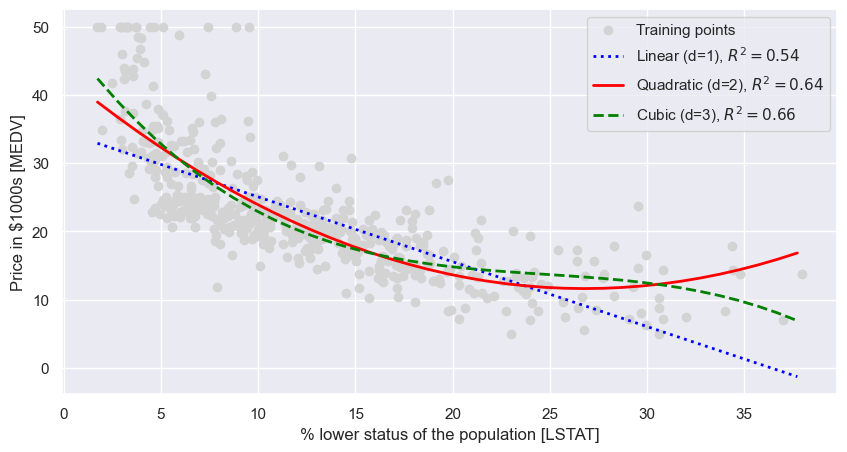

In [56]:
# plot results
fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(X, y, label='Training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label='Linear (d=1), $R^2=%.2f$' % linear_r2, 
         color='blue', 
         lw=2, 
         linestyle=':')

plt.plot(X_fit, y_quad_fit, 
         label='Quadratic (d=2), $R^2=%.2f$' % quadratic_r2,
         color='red', 
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit, 
         label='Cubic (d=3), $R^2=%.2f$' % cubic_r2,
         color='green', 
         lw=2, 
         linestyle='--')

plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper right')

plt.show()

### other transformations ?
- polynomial is not always the best choice for modeling non-linear relationships
- e.g., MEDV-LSTAT scatterplot may lead to a hypothesis that a log-transformation of the LSTAT feature variable and the square root of MEDV may project the data onto linear feature space suitable for a linear regression fit
    - $f(x) = e^{-x}$
    - $log(f(x)) = -x$
- natural log of an exponential function is a straight line

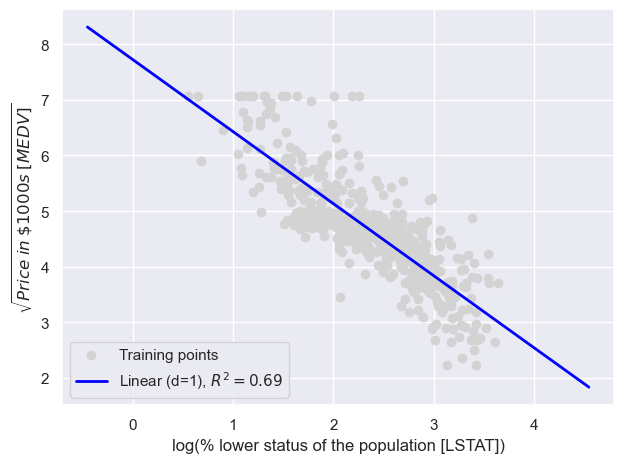

In [57]:
X = df[['LSTAT']].values
y = df['MEDV'].values

# transform features
X_log = np.log(X)
y_sqrt = np.sqrt(y)

# fit features
X_fit = np.arange(X_log.min()-1, X_log.max()+1, 1)[:, np.newaxis]

regr = regr.fit(X_log, y_sqrt)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y_sqrt, regr.predict(X_log))

# plot results
plt.scatter(X_log, y_sqrt, label='Training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label='Linear (d=1), $R^2=%.2f$' % linear_r2, 
         color='blue', 
         lw=2)

plt.xlabel('log(% lower status of the population [LSTAT])')
plt.ylabel('$\sqrt{Price \; in \; \$1000s \; [MEDV]}$')
plt.legend(loc='lower left')

plt.tight_layout()
#plt.savefig('images/10_13.png', dpi=300)
plt.show()

## Decision Tree Regressor
- Decision Tree can be used as a regressor model
![DT Regressor](./images/DT-Regressor.png)

- points to note:
    1. no data transformation is required; the feature is analyzed one at a time
    2. DT regressor captures the general trend in the data
    3. doesn't capture the continuity and differentiability of the desired prediction
    4. need to be careful about choosing an appropriate value for the depth of the tree so as to not overfit or underfit the data
    
- let's visualize fitting the regression curve with a decision tree
- the black line in the plot is the predicted value
- the line should be straight - vertical and horizontal not slanting as it doesn't capture the continuity and differentiability of the desired prediction
    - for vertical line, there are two outcomes based on the result of the <= decision on each node

In [58]:
from sklearn.tree import DecisionTreeRegressor

In [59]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)    
    return 

In [60]:
X = df[['LSTAT']].values
y = df.MEDV

In [61]:
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)
sort_idx = X.flatten().argsort()

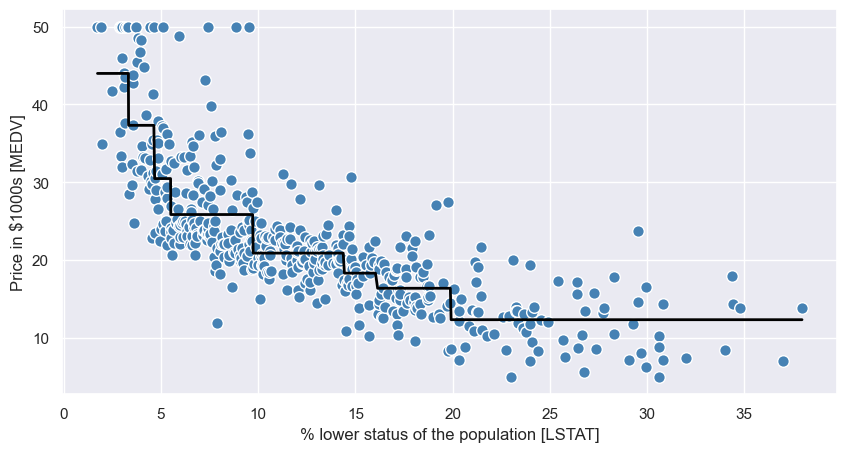

In [62]:
fig, ax = plt.subplots(figsize=(10, 5))
lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()

In [57]:
# making predictions
# generate 10 random LSTAT samples using np.random
X_test = np.random.choice(X.max(axis=1), 10) # random values between 0 and max LSTAT

In [58]:
X_test = X_test[:, np.newaxis]

In [59]:
X_test

array([[ 8.81],
       [14.81],
       [ 8.26],
       [ 5.29],
       [ 9.69],
       [ 4.73],
       [ 9.74],
       [ 8.23],
       [13.22],
       [18.72]])

In [60]:
y_pred = tree.predict(X_test)

In [74]:
tree.predict([[18]])

array([16.36666667])

In [ ]:
pred

In [61]:
y_pred

array([25.84701493, 18.30882353, 25.84701493, 30.47142857, 25.84701493,
       30.47142857, 20.8862069 , 25.84701493, 20.8862069 , 16.36666667])

### MSE/$R^2$? 
- since we don't know the actual y for the random test data, we can't calculate the MSE/$R^2$
- let's split the dataset into train/test and evaluate the DT Regressor model

In [75]:
# 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

In [76]:
y_train_pred = tree.predict(X_train)

In [77]:
print('Training MSE linear: %.3f'%
        mean_squared_error(y_train, y_train_pred))
print('Training R^2 linear: %.3f'%
        r2_score(y_train, y_train_pred))

Training MSE linear: 22.454
Training R^2 linear: 0.736


In [78]:
print('Testing MSE linear: %.3f'%
        mean_squared_error(y_test, y_pred))
print('Testing R^2 linear: %.3f'%
        r2_score(y_test, y_pred))

Testing MSE linear: 39.417
Testing R^2 linear: 0.516


### Underfitting and Overfitting Decision Tree
- DT Regressor models can suffer from underfit and overfit
- one of the reasons could be "Tree Depth"
- higher the the tree depth, more leaf nodes
    - tree with 10 levels, will have $2^{10} = 1024$ leaves
- leaves with very fewer houses will make predictions that are quite close to those homes' actual values
    - however, they may make unreliable predictions for new data
    - because, each prediction is based on only a few houses
    
![DT under and overfitting](./images/dt-fitting-errors.png)

### Finding the optimal leaf nodes
- Scit-kit learn DT Regressor provides `max_leaf_nodes` argument to control overfitting vs underfitting
- we can use a utility function to help compare MSE scores from models with different `max_leaf_nodes`

In [79]:
def get_mse(max_leaf_nodes, X_train, y_train, X_test, y_test):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(X_train, y_train)
    y_preds = model.predict(X_test)
    mse = mean_squared_error(y_test, y_preds)
    return mse

In [80]:
# compare MSE with differing values of max_leaf_nodes
errors = []
for i in range(1, 11, 1):
    max_leaf_nodes = 2**i
    mse_err = get_mse(max_leaf_nodes, X_train, y_train, X_test, y_test)
    print("Max leaf nodes: %d  \t\t Mean Squared Error:  %d" %(max_leaf_nodes, mse_err))
    errors.append((mse_err, max_leaf_nodes))

Max leaf nodes: 2  		 Mean Squared Error:  61
Max leaf nodes: 4  		 Mean Squared Error:  47
Max leaf nodes: 8  		 Mean Squared Error:  38
Max leaf nodes: 16  		 Mean Squared Error:  40
Max leaf nodes: 32  		 Mean Squared Error:  41
Max leaf nodes: 64  		 Mean Squared Error:  40
Max leaf nodes: 128  		 Mean Squared Error:  45
Max leaf nodes: 256  		 Mean Squared Error:  47
Max leaf nodes: 512  		 Mean Squared Error:  47
Max leaf nodes: 1024  		 Mean Squared Error:  47


In [83]:
mse, optimal_leaves = min(errors)

In [84]:
print(f'Optimal leaves: {optimal_leaves} MSE: {mse:.3f}')

Optimal leaves: 8 MSE: 38.024


In [85]:
# let's find the optimal depth of the tree
import math

In [86]:
print(f'Optimal depth = {math.floor(math.log2(optimal_leaves))}')

Optimal depth = 3


## Random forest regression
- a random forest is an ensemble technique that combines multiple decision trees
- a random forest usually has a better generalization performance than an individual decision tree due to randomness (which helps to decrease the model's variance)
- RF are also less sensitive to outliers and don't require much parameter tuning
- only parameter that could be tuned is number of trees in the forest
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
- let's apply `RandomForestRegression` to Housing dataset

In [87]:
# use all the features
X = df.iloc[:, :-1].values
y = df.MEDV
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                    test_size=.2, random_state=1)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                    test_size=.2, random_state=1)

In [89]:
from sklearn.ensemble import RandomForestRegressor

In [90]:
forest = RandomForestRegressor(random_state=1, n_jobs=-1)

In [91]:
# train and test the model and find MSE and R^2
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 1.237, test: 8.916
R^2 train: 0.985, test: 0.910


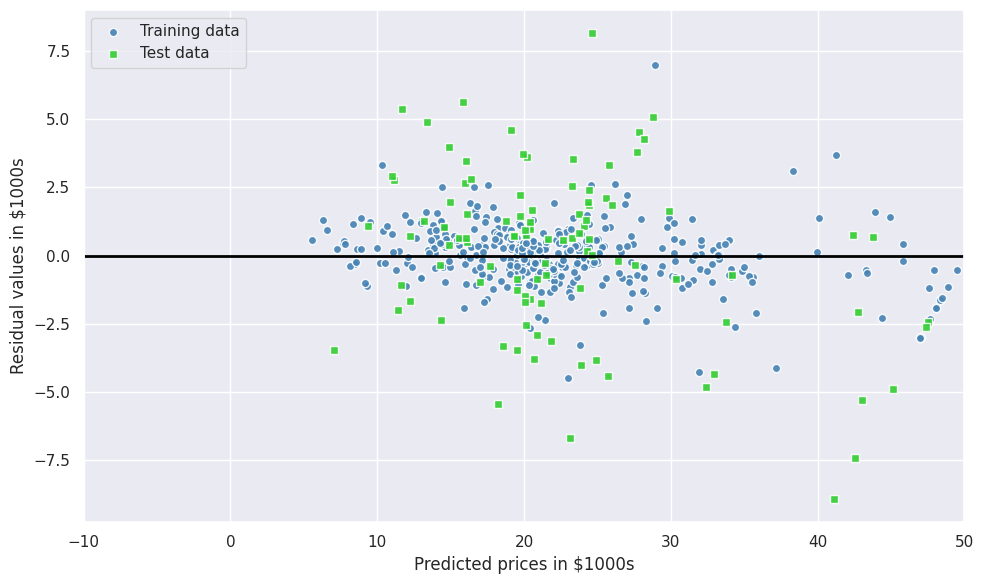

In [92]:
# Let's plot the residuals of the predictions
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(y_train_pred,  
            y_train_pred - y_train, 
            c='steelblue',
            edgecolor='white',
            marker='o', 
            s=35,
            alpha=0.9,
            label='Training data')
plt.scatter(y_test_pred,  
            y_test_pred - y_test, 
            c='limegreen',
            edgecolor='white',
            marker='s', 
            s=35,
            alpha=0.9,
            label='Test data')

plt.xlabel('Predicted prices in $1000s')
plt.ylabel('Residual values in $1000s')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='black')
plt.xlim([-10, 50])
plt.tight_layout()

plt.show()

### Feature ranking
- both `RandomForestClassifier` and `RandomForestRegressor` provide `feature_importances_` attribute
- the following code displays the ranking and bar charts of each feature based on its importance value
- model trained above is used to demostrate it

 1) LSTAT                          0.510220
 2) RM                             0.278027
 3) DIS                            0.065279
 4) CRIM                           0.040268
 5) NOX                            0.026228
 6) PTRATIO                        0.019412
 7) AGE                            0.019397
 8) B                              0.013948
 9) TAX                            0.013419
10) INDUS                          0.008226
11) RAD                            0.003779
12) ZN                             0.000963
13) CHAS                           0.000835


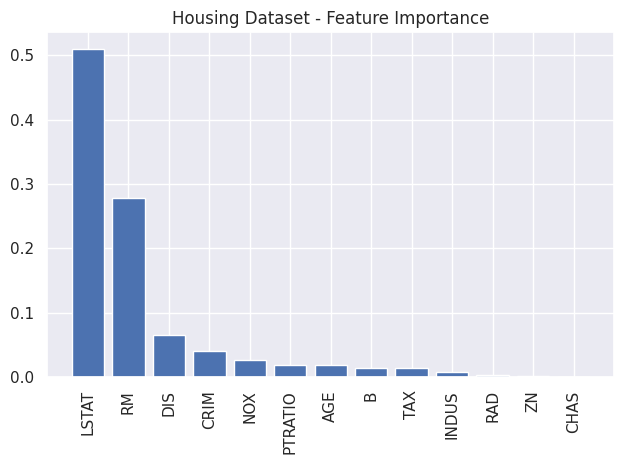

In [93]:
feat_labels = df.columns[:-1]
importances = forest.feature_importances_

# https://numpy.org/doc/stable/reference/generated/numpy.argsort.html
# return the indices that would sort the importances array and reverse it
indices = np.argsort(importances)[::-1]

# print all the features and their importances in highest to lowest importance
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

# plot the histogram bar chart
plt.title('Housing Dataset - Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
#plt.savefig('images/04_09.png', dpi=300)
plt.show()

In [94]:
indices

array([12,  5,  7,  0,  4, 10,  6, 11,  9,  2,  8,  1,  3])

## Use top features to train RandomForestRegressor
- use forward selection technique from highest to lowest important feature
- can also use to train and test other regressor models

In [ ]:
df

In [95]:
MSEs = [] # collect all the MSE
R2s = [] # collect all the R^2
feature_ids = []
y = df.MEDV
for feature_id in indices:
    feature_ids.append(feature_id)
    X = df.iloc[:, feature_ids].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                    test_size=.2, random_state=1)
    forest = RandomForestRegressor(random_state=1, n_jobs=-1)
    forest.fit(X_train, y_train)
    y_train_pred = forest.predict(X_train)
    y_test_pred = forest.predict(X_test)
    mse = mean_squared_error(y_test, y_test_pred)
    print('Top features: %d MSE train: %.3f, test: %.3f' % (
        len(feature_ids),
        mean_squared_error(y_train, y_train_pred),
        mse))
    r2 = r2_score(y_test, y_test_pred)
    print('Top features: %d R^2 train: %.3f, test: %.3f' % (
        len(feature_ids),
        r2_score(y_train, y_train_pred),
        r2))
    MSEs.append((mse, len(feature_ids)))
    R2s.append((r2, len(feature_ids)))

Top features: 1 MSE train: 7.998, test: 35.750
Top features: 1 R^2 train: 0.901, test: 0.638
Top features: 2 MSE train: 3.034, test: 21.981
Top features: 2 R^2 train: 0.962, test: 0.778
Top features: 3 MSE train: 1.942, test: 15.085
Top features: 3 R^2 train: 0.976, test: 0.847
Top features: 4 MSE train: 1.668, test: 11.592
Top features: 4 R^2 train: 0.979, test: 0.883
Top features: 5 MSE train: 1.461, test: 9.578
Top features: 5 R^2 train: 0.982, test: 0.903
Top features: 6 MSE train: 1.307, test: 8.965
Top features: 6 R^2 train: 0.984, test: 0.909
Top features: 7 MSE train: 1.318, test: 9.323
Top features: 7 R^2 train: 0.984, test: 0.906
Top features: 8 MSE train: 1.328, test: 9.162
Top features: 8 R^2 train: 0.984, test: 0.907
Top features: 9 MSE train: 1.251, test: 8.323
Top features: 9 R^2 train: 0.985, test: 0.916
Top features: 10 MSE train: 1.288, test: 8.673
Top features: 10 R^2 train: 0.984, test: 0.912
Top features: 11 MSE train: 1.244, test: 8.850
Top features: 11 R^2 train:

In [96]:
# let's see the MSEs for test datasets
MSEs

[(35.750280034059024, 1),
 (21.980664519607817, 2),
 (15.085319715686254, 3),
 (11.591906529411755, 4),
 (9.578348715686268, 5),
 (8.964654235294116, 6),
 (9.322661823529405, 7),
 (9.162058647058819, 8),
 (8.322756862745102, 9),
 (8.672584147058828, 10),
 (8.850064137254908, 11),
 (8.612263990196086, 12),
 (8.407741147058829, 13)]

In [97]:
# can plot 
import matplotlib.pyplot as plt

In [98]:
data = pd.DataFrame(MSEs)

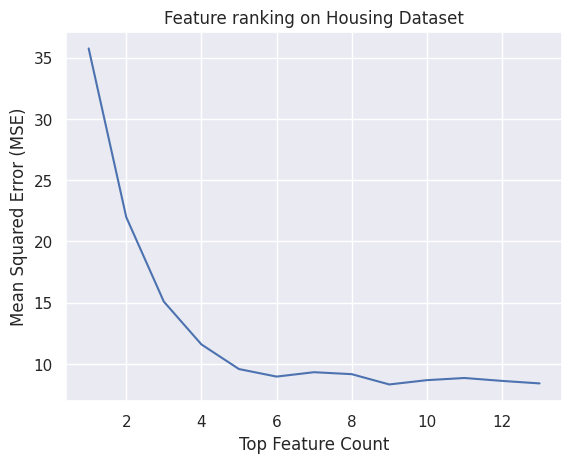

In [99]:
plt.plot(data[1], data[0])
plt.xlabel("Top Feature Count")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Feature ranking on Housing Dataset")
plt.show()

In [ ]:
# let's see the R2s for test datasets
R2s
# can do line plot as well